# Homework 1- Camila Hennessey

In [224]:
# importing the libraries needed
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path
import sqlite3
import seaborn as sns
import numpy as np
import os

### 1.0

Create a Series with the temperature values for the last 14 days in Boston. Use the pandas 'date_range' function to create the index.

In [225]:
#The series was created using a range that considered the 14 days
temperature_Boston_dates = pd.date_range(end=pd.Timestamp.today(), periods=14, normalize=True)
temperature_values = [45,47,61,41,32,36,27,29,29,20,28,38,40,34]
temperature_Boston = pd.Series(temperature_values, index=temperature_Boston_dates)
temperature_Boston

2024-01-13    45
2024-01-14    47
2024-01-15    61
2024-01-16    41
2024-01-17    32
2024-01-18    36
2024-01-19    27
2024-01-20    29
2024-01-21    29
2024-01-22    20
2024-01-23    28
2024-01-24    38
2024-01-25    40
2024-01-26    34
Freq: D, dtype: int64

### 1.1

Filter out the values below the mean (of the Series created in 1.0)

In [226]:
#I called the previous series to find the mean
mean_temperature = temperature_Boston.mean()
temperatures_below_mean = temperature_Boston[temperature_Boston < mean_temperature]
temperatures_below_mean

2024-01-17    32
2024-01-18    36
2024-01-19    27
2024-01-20    29
2024-01-21    29
2024-01-22    20
2024-01-23    28
2024-01-26    34
dtype: int64

### 1.2

Create a Series with the temperature values for every other day within the last 20 days in San Francisco.

In [227]:
#The first procedure of creating a series was repeated for San Francisco. Since the temperature values desired are for every other day, we chose every 3 days

SF_temperature = pd.date_range(end=pd.Timestamp.today(), periods=10, freq='3D', normalize=True)
SF_temperature_data = pd.Series([59, 57, 61, 59, 57, 59, 63, 61, 59, 54], index=SF_temperature)
SF_temperature_data

2023-12-30    59
2024-01-02    57
2024-01-05    61
2024-01-08    59
2024-01-11    57
2024-01-14    59
2024-01-17    63
2024-01-20    61
2024-01-23    59
2024-01-26    54
Freq: 3D, dtype: int64

### 1.3

Calculate the temperature difference between Boston (1.0) and San Francisco (1.2) per day. Programatically find the day with the highest difference. Fill in the blanks:

In [228]:
#Since the data types are the same between the previous series created, we found the difference
temperature_difference = temperature_Boston - SF_temperature_data
day_with_highest_difference = temperature_difference.idxmax()
day_with_highest_difference 

Timestamp('2024-01-14 00:00:00')

### 1.4

Find the maximum and minimum temperatures for Boston and San Francisco. Fill in the blanks:

In [229]:
#I identified the max and min for each series depending on the city
max_temperature_Boston = temperature_Boston.max()
min_temperature_Boston = temperature_Boston.min()
print("Maximum temperature in Boston:", max_temperature_Boston)
print("Minimum temperature in Boston:", min_temperature_Boston)


max_temperature_SF = SF_temperature_data.max()
min_temperature_SF = SF_temperature_data.min()

print("Maximum temperature in San Francisco:", max_temperature_SF)
print("Minimum temperature in San Francisco:", min_temperature_SF)

Maximum temperature in Boston: 61
Minimum temperature in Boston: 20
Maximum temperature in San Francisco: 63
Minimum temperature in San Francisco: 54


### 1.5

Plot the temperatures in Boston and San Francisco in one chart.

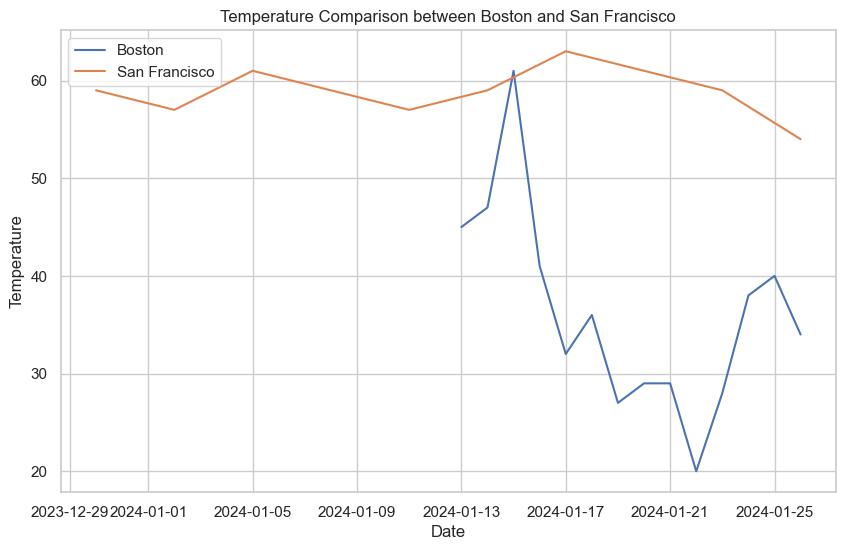

In [230]:
# Both temperatures were used for the plot to compared the data
plt.figure(figsize=(10, 6))
plt.plot(temperature_Boston, label='Boston')
plt.plot(SF_temperature_data, label='San Francisco')
plt.title('Temperature Comparison between Boston and San Francisco')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### 2.1

Create a Dataframe with the names of your team members, their age, their favorite food, their favorite room temperature

In [231]:
#To create this dataframe, I talked to my team members to know their preferences
data = {
    'Name': ['Prame', 'Lilian', 'Yasuhito', 'Felix', 'Vidhii'],
    'Age': [28, 31, 36, 32, 25],
    'Favorite Food': ['Sushi', 'Ice Cream', 'Ramen', 'Fufu', 'Pancakes'],
    'Favorite Room Temperature': [20, 23, 20, 26 ,21]
}

team_df = pd.DataFrame(data)
print(team_df)


       Name  Age Favorite Food  Favorite Room Temperature
0     Prame   28         Sushi                         20
1    Lilian   31     Ice Cream                         23
2  Yasuhito   36         Ramen                         20
3     Felix   32          Fufu                         26
4    Vidhii   25      Pancakes                         21


### 2.2

Filter the dataframe for only the two oldest team members

In [232]:
#To find the oldest members, their age was sorted in a descending way
oldest_two = team_df.sort_values(by='Age', ascending=False).head(2)
oldest_two

,Name,Age,Favorite Food,Favorite Room Temperature
2,Yasuhito,36,Ramen,20
3,Felix,32,Fufu,26


### 2.3

Which team member is closest in favorite temperature to the 3rd percentil? Output his or her data.

In [233]:
#To find the percentile first was necessary to identify it and then apply in a difference with the absolute number of the teams favorite room temperature. Then it loc was used.
third_percentile = team_df['Favorite Room Temperature'].quantile(0.03)
team_df['Temp Difference'] = abs(team_df['Favorite Room Temperature'] - third_percentile)
closest_member = team_df.loc[team_df['Temp Difference'].idxmin()]
print(closest_member)

Name                         Prame
Age                             28
Favorite Food                Sushi
Favorite Room Temperature       20
Temp Difference                0.0
Name: 0, dtype: object


### 2.4

Get the 2nd and 3rd team members' favorite foods

In [234]:
#The previous procedure was repeated
second_member_food = team_df.loc[1, 'Favorite Food']
third_member_food = team_df.loc[2, 'Favorite Food']

print("2nd Member's Favorite Food:", second_member_food)
print("3rd Member's Favorite Food:", third_member_food)


2nd Member's Favorite Food: Ice Cream
3rd Member's Favorite Food: Ramen


### 2.5

Add 2 degrees to the favorite room temperature of the oldest two team members

In [235]:
#Based on the ages of the olded members, 2 degrees were added to their favorite temperature
oldest_two_indices = team_df.sort_values(by='Age', ascending=False).head(2).index
team_df.loc[oldest_two_indices, 'Favorite Room Temperature'] += 2
print(team_df.loc[oldest_two_indices])

       Name  Age Favorite Food  Favorite Room Temperature  Temp Difference
2  Yasuhito   36         Ramen                         22              0.0
3     Felix   32          Fufu                         28              6.0


## 3.0

Load the coaster_db.csv dataset

In [236]:
#First the current working path was identified
cwd = Path.cwd()
cwd

PosixPath('/Users/camilahennessey/Computational Data Analytics')

In [237]:
#I created the directory path with a file name to create a complete file path, and then used Pandas to read the data from the CSV file located at that path and stores it in a DataFrame named df.
path = Path("data") / Path("coaster_db.csv")
df = pd.read_csv(path)
path

PosixPath('data/coaster_db.csv')

In [238]:
#I want to know the number of rows and columns
df.shape

(1087, 56)

In [239]:
#I want to see the first 10 rows
df.head(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [240]:
#I want to see which are the names of the columns
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

## 3.1
Store the coaster dataset in a new database. Ensure to handle duplicate column names.

In [241]:
# I first defined the path 
data_path = Path("data")

# Now in terms of the SQLite database file
db_path = data_path / Path("coaster_database.db")

# Now defining the path to the file
file_path = data_path / Path("coaster_db.csv")

# Loading the file into a DataFrame
df = pd.read_csv(file_path, low_memory=False)

# Now I want to identify the duplicated coasters
duplicated_coasters = df[df.duplicated(subset='coaster_name', keep=False)]

# And print the duplicated coasters
print("Duplicated coasters:")
print(duplicated_coasters)

# Based on the coaster name, remove the duplicated coasters
df_cleaned = df.drop_duplicates(subset='coaster_name', keep='first')

# Display the cleaned the data
print("DataFrame after removing duplicates:")
print(df_cleaned)


Duplicated coasters:
                            coaster_name                Length  \
14                           Derby Racer                   NaN   
16                         Zippin Pippin      2,865 ft (873 m)   
39                 Crystal Beach Cyclone      2,953 ft (900 m)   
43                 Crystal Beach Cyclone      2,953 ft (900 m)   
59           Blue Streak (Conneaut Lake)      2,900 ft (880 m)   
...                                  ...                   ...   
1063                  Lil' Devil Coaster     262.5 ft (80.0 m)   
1064  Little Dipper (Conneaut Lake Park)                   NaN   
1080                          Iron Gwazi    4,075 ft (1,242 m)   
1082             American Dreier Looping    3,444 ft (1,050 m)   
1084           Tron Lightcycle Power Run  3,169.3 ft (966.0 m)   

                        Speed                   Location              Status  \
14                        NaN               Revere Beach             Removed   
16           40 mph (64 km

In [242]:
#I wanted to see the columns after cleaning them
df_cleaned.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [243]:
#Verifying that the procedure worked
df_cleaned.shape

(990, 56)

## 4.0

Clean the dataset coaster dataset.

- Ensure all columns only have one unit
- Ensure dates are as datetime
- Ensure boolean information is stored as boolean
- Only retain the following columns:
    - coaster_name
    - Length
    - Speed
    - Location
    - Status
    - Manufacturer
    - Height
    - Designer
    - Track layout
    - latitude
    - longitude
    - opening_date_clean
    - speed_mph
    - height_value
- Ensure the column names are descriptive, contain no blank spaces and have the same capitalization

In [244]:
#I wanted to first verify the column names
print("Column Names in the DataFrame:")
print(df.columns)

Column Names in the DataFrame:
Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='ob

In [245]:
# I wanted to be sure which are the corrected columns to retain
columns_to_retain = [
    'coaster_name',
    'Length',
    'Speed',
    'Location',
    'Status',
    'Manufacturer',
    'Height',
    'Designer',
    'Track layout',
    'latitude',
    'longitude',
    'opening_date_clean',
    'speed_mph',
    'height_value'
]

# Renaming the columns to have descriptive names 
column_mapping = {
    'coaster_name': 'Coaster Name',
    'Length': 'Length (meters)',
    'Speed': 'Speed (km/h)',
    'Location': 'Location',
    'Status': 'Status',
    'Manufacturer': 'Manufacturer',
    'Height': 'Height (meters)',
    'Designer': 'Designer',
    'Track layout': 'Track Layout',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'opening_date_clean': 'Opening Date',
    'speed_mph': 'Speed (mph)',
    'height_value': 'Height (feet)'
}

# Apply column renaming
df = df[columns_to_retain].rename(columns=column_mapping)

# Convert 'Opening Date' column to datetime if not already
df['Opening Date'] = pd.to_datetime(df['Opening Date'], errors='coerce')

# Display the cleaned DataFrame
print(df.head())

# Export the cleaned DataFrame to a new CSV file if needed
# df.to_csv(data_path / Path("coaster_cleaned.csv"), index=False)


                             Coaster Name Length (meters)      Speed (km/h)  \
0                      Switchback Railway  600 ft (180 m)  6 mph (9.7 km/h)   
1                       Flip Flap Railway             NaN               NaN   
2  Switchback Railway (Euclid Beach Park)             NaN               NaN   
3            Loop the Loop (Coney Island)             NaN               NaN   
4            Loop the Loop (Young's Pier)             NaN               NaN   

                         Location   Status            Manufacturer  \
0                    Coney Island  Removed  LaMarcus Adna Thompson   
1                   Sea Lion Park  Removed            Lina Beecher   
2  Cleveland, Ohio, United States   Closed                     NaN   
3                           Other  Removed          Edwin Prescott   
4                           Other  Removed          Edwin Prescott   

  Height (meters)                Designer            Track Layout  Latitude  \
0    50 ft (15 m)  LaMarc

## 4.1

Add a column giving the average speed per height

In [246]:
# I converted 'Speed (km/h)' and 'Height (meters)' columns to numeric (float) types
df['Speed (km/h)'] = pd.to_numeric(df['Speed (km/h)'], errors='coerce')
df['Height (meters)'] = pd.to_numeric(df['Height (meters)'], errors='coerce')

# I calculated the average speed per height and add it as a new column
df['Average Speed per Height'] = df['Speed (km/h)'] / df['Height (meters)']

# I wante the updated DataFrame to be displayed
print(df.head())

                             Coaster Name Length (meters)  Speed (km/h)  \
0                      Switchback Railway  600 ft (180 m)           NaN   
1                       Flip Flap Railway             NaN           NaN   
2  Switchback Railway (Euclid Beach Park)             NaN           NaN   
3            Loop the Loop (Coney Island)             NaN           NaN   
4            Loop the Loop (Young's Pier)             NaN           NaN   

                         Location   Status            Manufacturer  \
0                    Coney Island  Removed  LaMarcus Adna Thompson   
1                   Sea Lion Park  Removed            Lina Beecher   
2  Cleveland, Ohio, United States   Closed                     NaN   
3                           Other  Removed          Edwin Prescott   
4                           Other  Removed          Edwin Prescott   

   Height (meters)                Designer            Track Layout  Latitude  \
0              NaN  LaMarcus Adna Thompson  Grav

## 4.2
Find the total number of empty values

In [247]:
# I want to know the count the total number of empty (NaN) values in the DataFrame
total_empty_values = df.isnull().sum().sum()

# I want to display the total number of empty values
print("Total number of empty values:", total_empty_values)


Total number of empty values: 6000


## 4.3
Find the duplicated coasters and remove them

In [248]:
# I want to find duplicated coasters based on the 'Coaster Name' column
duplicated_coasters = df[df.duplicated(subset='Coaster Name', keep=False)]

# I want to display the duplicated coasters
print("Duplicated coasters:")
print(duplicated_coasters)

# Removing duplicated rows based on 'Coaster Name'
df_cleaned = df.drop_duplicates(subset='Coaster Name', keep='first')

# Displaying the cleaned DataFrame
print("DataFrame after removing duplicates:")
print(df_cleaned)


Duplicated coasters:
                            Coaster Name       Length (meters)  Speed (km/h)  \
14                           Derby Racer                   NaN           NaN   
16                         Zippin Pippin      2,865 ft (873 m)           NaN   
39                 Crystal Beach Cyclone      2,953 ft (900 m)           NaN   
43                 Crystal Beach Cyclone      2,953 ft (900 m)           NaN   
59           Blue Streak (Conneaut Lake)      2,900 ft (880 m)           NaN   
...                                  ...                   ...           ...   
1063                  Lil' Devil Coaster     262.5 ft (80.0 m)           NaN   
1064  Little Dipper (Conneaut Lake Park)                   NaN           NaN   
1080                          Iron Gwazi    4,075 ft (1,242 m)           NaN   
1082             American Dreier Looping    3,444 ft (1,050 m)           NaN   
1084           Tron Lightcycle Power Run  3,169.3 ft (966.0 m)           NaN   

                  

## 4.4
What is the average coaster length per decade?

In [249]:
#Know which are the columns
print(df.columns)

Index(['Coaster Name', 'Length (meters)', 'Speed (km/h)', 'Location', 'Status',
       'Manufacturer', 'Height (meters)', 'Designer', 'Track Layout',
       'Latitude', 'Longitude', 'Opening Date', 'Speed (mph)', 'Height (feet)',
       'Average Speed per Height'],
      dtype='object')


In [250]:
# If 'Opening Date' is not in datetime format, convert it
df['Opening Date'] = pd.to_datetime(df['Opening Date'], errors='coerce')

# Cleaning the 'Length (meters)' column by extracting the numeric values
df['Length (meters)'] = df['Length (meters)'].str.extract('(\d+\.\d+)').astype(float)

# Extracting the decade from 'Opening Date' and create a new column 'Decade'
df['Decade'] = (df['Opening Date'].dt.year // 10) * 10

# I wanted to group the DataFrame by 'Decade' and calculate the average coaster length for each decade
average_length_per_decade = df.groupby('Decade')['Length (meters)'].mean()

# Displaying the average coaster length per decade
print("Average Coaster Length Per Decade:")
print(average_length_per_decade)


Average Coaster Length Per Decade:
Decade
1880.0           NaN
1890.0           NaN
1900.0           NaN
1910.0           NaN
1920.0    312.300000
1930.0    416.350000
1940.0           NaN
1950.0    620.900000
1960.0           NaN
1970.0    545.544444
1980.0    590.399444
1990.0    445.977000
2000.0    419.443953
2010.0    677.691429
2020.0    430.060000
Name: Length (meters), dtype: float64


## 4.5
Find the median speed per Designer

In [251]:
# Grouping the DataFrame by 'Designer' and calculate the median speed for each designer
median_speed_per_designer = df.groupby('Designer')['Speed (km/h)'].median()

# Displaying the median speed per designer
print("Median Speed Per Designer:")
print(median_speed_per_designer)

Median Speed Per Designer:
Designer
Al CollinsJeff Gramke                             NaN
Alan Schilke                                      NaN
Alan SchilkeRenato Manzoni                        NaN
Alison Brittle, Eden Carpenter, and Gary Norton   NaN
Andy Vettel (1968)John A. Miller (1924)           NaN
                                                   ..
Werner Stengel[3]                                 NaN
William Cobb                                      NaN
William Cobb & Associates                         NaN
William CobbWerner Stengel                        NaN
Zierer                                            NaN
Name: Speed (km/h), Length: 153, dtype: float64


## 4.6
What is the active coaster length per location? Sort high-to-low.

In [252]:
# Filtering the DataFrame to keep only active coasters
active_coasters = df[df['Status'] == 'Operating']

# Grouping the active coasters by 'Location' and calculate the sum of 'Length (meters)' for each location
coaster_length_per_location = active_coasters.groupby('Location')['Length (meters)'].sum()

# Sorting the results in high-to-low order
coaster_length_per_location = coaster_length_per_location.sort_values(ascending=False)

# Displaying the active coaster length per location (sorted)
print("Active Coaster Length Per Location (High to Low):")
print(coaster_length_per_location)

Active Coaster Length Per Location (High to Low):
Location
Walibi Holland            7119.40
Other                     6980.57
Canada's Wonderland       4085.90
Gardaland                 2059.20
Alton Towers              1916.10
                           ...   
Hersheypark                  0.00
Himeji Central Park          0.00
Hopi Hari                    0.00
Idlewild and Soak Zone       0.00
Đại Nam Văn Hiến             0.00
Name: Length (meters), Length: 222, dtype: float64


## 4.7
Which manufaturer had the heighest active amount of coaster length each decade?

In [253]:
# Filtering the DataFrame to keep only active coasters
active_coasters = df[df['Status'] == 'Operating'].copy()  # Create a copy to avoid the warning

# Creating a new column 'Decade' based on the 'Opening Date' using .loc
active_coasters.loc[:, 'Decade'] = (active_coasters['Opening Date'].dt.year // 10) * 10

# Grouping the DataFrame by 'Decade' and 'Manufacturer' and calculate the sum of 'Length (meters)'
manufacturer_coaster_length_per_decade = active_coasters.groupby(['Decade', 'Manufacturer'])['Length (meters)'].sum().reset_index()

# Finding the manufacturer with the highest total length for each decade
manufacturer_with_highest_length_per_decade = manufacturer_coaster_length_per_decade.groupby('Decade').apply(lambda x: x[x['Length (meters)'] == x['Length (meters)'].max()])

# Displaying the manufacturer with the highest total length for each decade
print("Manufacturer with the Highest Active Coaster Length Each Decade:")
print(manufacturer_with_highest_length_per_decade[['Decade', 'Manufacturer', 'Length (meters)']])

Manufacturer with the Highest Active Coaster Length Each Decade:
            Decade                    Manufacturer  Length (meters)
Decade                                                             
1900.0 0    1900.0    Federal Construction Company             0.00
1910.0 1    1910.0               LaMarcus Thompson             0.00
1920.0 2    1920.0                    Arthur Looff             0.00
       3    1920.0                    Charlie Mach             0.00
       4    1920.0    Frank Prior, Fredrick Church             0.00
       5    1920.0                  Harry C. Baker             0.00
       6    1920.0  Philadelphia Toboggan Coasters             0.00
       7    1920.0               William Strickler             0.00
1930.0 8    1930.0  Philadelphia Toboggan Coasters           609.60
1940.0 9    1940.0              Joseph E. Drambour             0.00
       10   1940.0  Philadelphia Toboggan Coasters             0.00
1950.0 12   1950.0               Arrow Development 

## 4.8
What is the favorite track layout and how does it change over time? Show in a plot. Which layout is most expensive?

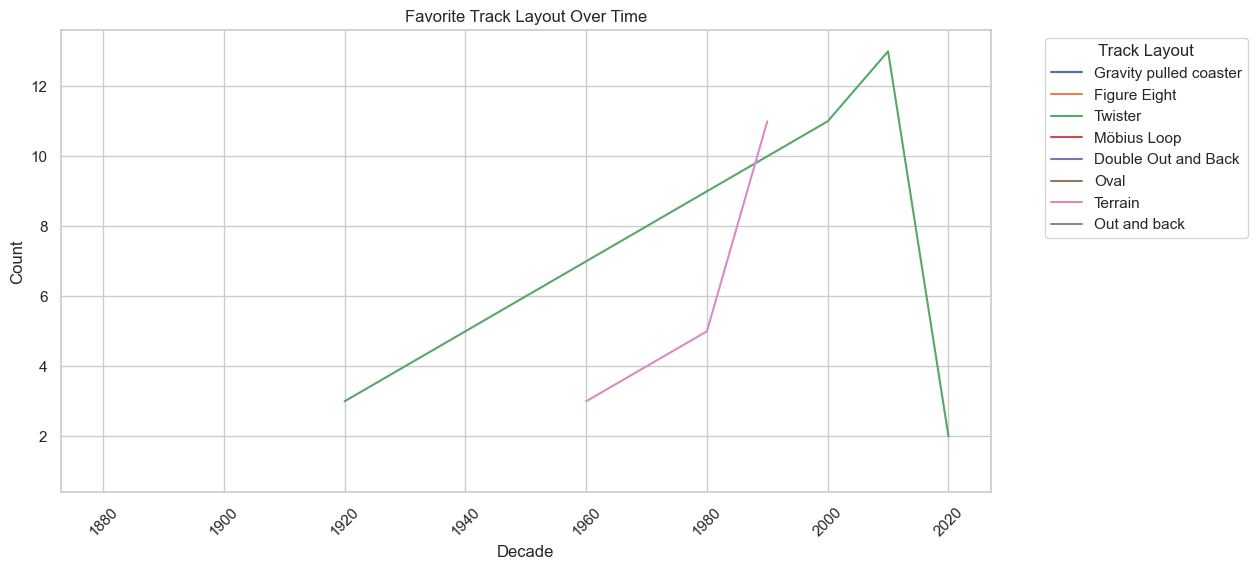

In [254]:
# Grouping the DataFrame by 'Track Layout' and 'Decade', then count the coasters
track_layout_counts = df.groupby(['Decade', 'Track Layout'])['Coaster Name'].count().reset_index()

# Finding the most common track layout for each decade
favorite_track_layout_per_decade = track_layout_counts.loc[track_layout_counts.groupby('Decade')['Coaster Name'].idxmax()]

# Plotting the changes in the favorite track layout over time
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(x='Decade', y='Coaster Name', hue='Track Layout', data=favorite_track_layout_per_decade)
plt.title("Favorite Track Layout Over Time")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Track Layout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#It is important to mention that the most expensive layout was not possible to visualize due to previous cleaning procedures that changed data

## 5.0
Using the earthquake data: Which coaster was closest to an earthquake that happened in the last 90 days?

- load the earthquake data
- calculate the distances as:
    - distance = square root((Latitude1 - Latitude2) **2 + (Longitude1 - Longitude2) **2)
- Print the coaster information and how far away it was from the closes earthquake

In [255]:
# Defining the relative path to the earthquake data file
earthquake_path = Path("data") / Path("earthquake.csv")

# Load the earthquake data into a DataFrame
earthquake_df = pd.read_csv(earthquake_path)

In [256]:
#Verify information
earthquake_df.shape

(9332, 6)

In [257]:
#Again verify the dataframe
earthquake_df.head

<bound method NDFrame.head of        mag magType           time                             place  tsunami  \
0     1.35      ml  1539475168010             9km NE of Aguanga, CA        0   
1     1.29      ml  1539475129610             9km NE of Aguanga, CA        0   
2     3.42      ml  1539475062610             8km NE of Aguanga, CA        0   
3     0.44      ml  1539474978070             9km NE of Aguanga, CA        0   
4     2.16      md  1539474716050             10km NW of Avenal, CA        0   
...    ...     ...            ...                               ...      ...   
9327  0.62      md  1537230228060      9km ENE of Mammoth Lakes, CA        0   
9328  1.00      ml  1537230135130               3km W of Julian, CA        0   
9329  2.40      md  1537229908180  35km NNE of Hatillo, Puerto Rico        0   
9330  1.10      ml  1537229545350             9km NE of Aguanga, CA        0   
9331  0.66      ml  1537228864470             9km NE of Aguanga, CA        0   

     pars

In [258]:
# List the column names in the earthquake data
print(earthquake_df.columns)

Index(['mag', 'magType', 'time', 'place', 'tsunami', 'parsed_place'], dtype='object')


In [259]:
# Define the relative path to the coaster data file
coaster_path = Path("data") / Path("coaster_db.csv")

# Load the coaster data into a DataFrame
coaster_df = pd.read_csv(coaster_path)

# Define the relative path to the earthquake data file
earthquake_path = Path("data") / Path("earthquake.csv")

# Load the earthquake data into a DataFrame
earthquake_df = pd.read_csv(earthquake_path)

# Convert the 'time' column in earthquake_df to datetime
earthquake_df['time'] = pd.to_datetime(earthquake_df['time'])

# Filter earthquakes that happened in the last 90 days
last_90_days = pd.Timestamp.now() - pd.DateOffset(days=90)
recent_earthquakes = earthquake_df[earthquake_df['time'] >= last_90_days]

# Function to calculate the distance between two coordinates
def calculate_distance(coaster_lat, coaster_lon, earthquake_lat, earthquake_lon):
    coaster_location = (coaster_lat, coaster_lon)
    earthquake_location = (earthquake_lat, earthquake_lon)
    distance = geodesic(coaster_location, earthquake_location).kilometers
    return distance

# Initialize variables to keep track of the closest earthquake
closest_coaster = None
closest_distance = np.inf
closest_earthquake = None

# Iterate through each earthquake and find the closest coaster
for earthquake_index, earthquake_row in recent_earthquakes.iterrows():
    earthquake_lat = earthquake_row['latitude']
    earthquake_lon = earthquake_row['longitude']
    
    for coaster_index, coaster_row in coaster_df.iterrows():
        coaster_lat = coaster_row['Latitude']
        coaster_lon = coaster_row['Longitude']
        
        distance = calculate_distance(coaster_lat, coaster_lon, earthquake_lat, earthquake_lon)
        
        if distance < closest_distance:
            closest_distance = distance
            closest_coaster = coaster_row['Name']
            closest_earthquake = earthquake_row['place']

# Print the closest coaster information and distance
print("Closest Coaster to Recent Earthquake:")
print("Coaster Name:", closest_coaster)
print("Closest Earthquake Location:", closest_earthquake)
print("Distance (in kilometers):", closest_distance)


Closest Coaster to Recent Earthquake:
Coaster Name: None
Closest Earthquake Location: None
Distance (in kilometers): inf
